**Chapter 10 – Building Neural Networks with PyTorch**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-mlp/blob/main/10_neural_nets_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-mlp/blob/main/10_neural_nets_with_pytorch.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.10 or above:

In [2]:
import sys

assert sys.version_info >= (3, 10)

It also requires Scikit-Learn ≥ 1.6.1:

In [3]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

Are we using Colab or Kaggle?

In [4]:
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

If using Colab, a couple libraries are not pre-installed so we must install them manually:

In [5]:
if IS_COLAB:
    %pip install -q optuna torchmetrics

And of course we need PyTorch, specifically PyTorch ≥ 2.6.0:

In [6]:
import torch

assert Version(torch.__version__) >= Version("2.6.0")

As we did in earlier chapters, let's define the default font sizes to make the figures prettier:

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# PyTorch Fundamentals
## PyTorch Tensors

In [8]:
import torch

X = torch.tensor([[1.0, 4.0, 7.0], [2.0, 3.0, 6.0]])
X

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [9]:
X.shape

torch.Size([2, 3])

In [10]:
X.dtype

torch.float32

In [11]:
X[0, 1]

tensor(4.)

In [12]:
X[:, 1]

tensor([4., 3.])

In [13]:
10 * (X + 1.0)  # item-wise addition and multiplication

tensor([[20., 50., 80.],
        [30., 40., 70.]])

In [14]:
X.exp()

tensor([[   2.7183,   54.5982, 1096.6332],
        [   7.3891,   20.0855,  403.4288]])

In [15]:
X.mean()

tensor(3.8333)

In [16]:
X.max(dim=0)

torch.return_types.max(
values=tensor([2., 4., 7.]),
indices=tensor([1, 0, 0]))

In [17]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]])

In [18]:
import numpy as np

X.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [19]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [20]:
torch.tensor(np.array([[1., 4., 7.], [2., 3., 6.]]), dtype=torch.float32)

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [21]:
torch.FloatTensor(np.array([[1., 4., 7.], [2., 3., 6]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [22]:
# extra code: demonstrate torch.from_numpy()
X2_np = np.array([[1., 4., 7.], [2., 3., 6]])
X2 = torch.from_numpy(X2_np)  # X2_np and X2 share the same data in memory
X2_np[0, 1] = 88
X2

tensor([[ 1., 88.,  7.],
        [ 2.,  3.,  6.]], dtype=torch.float64)

In [23]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]])

In [24]:
X.relu_()
X

tensor([[1., 0., 7.],
        [2., 0., 6.]])

PyTorch tensors really resemble NumPy arrays. In fact, they have over 200 common functions!

In [25]:
# extra code: list functions that appear both in NumPy and PyTorch
functions = lambda mod: set(f for f in dir(mod) if callable(getattr(mod, f)))
", ".join(sorted(functions(torch) & functions(np)))

'__getattr__, abs, absolute, acos, acosh, add, all, allclose, amax, amin, angle, any, arange, arccos, arccosh, arcsin, arcsinh, arctan, arctan2, arctanh, argmax, argmin, argsort, argwhere, asarray, asin, asinh, atan, atan2, atanh, atleast_1d, atleast_2d, atleast_3d, bincount, bitwise_and, bitwise_left_shift, bitwise_not, bitwise_or, bitwise_right_shift, bitwise_xor, broadcast_shapes, broadcast_to, can_cast, ceil, clip, column_stack, concat, concatenate, conj, copysign, corrcoef, cos, cosh, count_nonzero, cov, cross, cumprod, cumsum, deg2rad, diag, diagflat, diagonal, diff, divide, dot, dsplit, dstack, dtype, einsum, empty, empty_like, equal, exp, exp2, expm1, eye, finfo, fix, flip, fliplr, flipud, float_power, floor, floor_divide, fmax, fmin, fmod, frexp, from_dlpack, frombuffer, full, full_like, gcd, gradient, greater, greater_equal, heaviside, histogram, histogramdd, hsplit, hstack, hypot, i0, iinfo, imag, inner, isclose, isfinite, isin, isinf, isnan, isneginf, isposinf, isreal, kron

## Hardware Acceleration

In [26]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

device

'mps'

In [27]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]])
M = M.to(device)
M.device

device(type='mps', index=0)

In [28]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [29]:
R = M @ M.T  # run some operations on the GPU
R

tensor([[14., 32.],
        [32., 77.]], device='mps:0')

In [30]:
M = torch.rand((1000, 1000))  # on the CPU
M @ M.T  # warmup
%timeit M @ M.T

M = M.to(device)
M @ M.T  # warmup
%timeit M @ M.T

772 μs ± 12.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
374 μs ± 3.61 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Autograd

Consider a simple function, $f(x) = x^2$.
Calculus tells us that the derivative of this function is $f'(x)=2x$. Let's evaluate $f(5)$ and the derivative $f'(5)$ using autograd. We expect to find $f(5)=5^2=25$ and $f'(5)=2*5=10$. Let's see!

In [31]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [32]:
f.backward()
x.grad

tensor(10.)

In [33]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [34]:
x

tensor(4., requires_grad=True)

Alternatively, we could have used this code for the gradient descent step (but using `no_grad()` is more common for this):

In [35]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad

In [36]:
x.grad.zero_()

tensor(0.)

Let's put everything together to get our training loop:

In [37]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    x.grad.zero_()  # reset the gradients

The variable `x` gets pushed towards 0, since that's the value that minimizes $f(x) = x^2$:

In [38]:
x

tensor(1.0185e-09, requires_grad=True)

# Implementing Linear Regression
## Linear Regression Using Tensors & Autograd

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [40]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

PyTorch expects the targets to have one row per sample, so let's reshape the targets to be column vectors:

In [41]:
y_train = torch.FloatTensor(y_train).view(-1, 1)
y_valid = torch.FloatTensor(y_valid).view(-1, 1)
y_test = torch.FloatTensor(y_test).view(-1, 1)

In [42]:
torch.manual_seed(42)
n_features = X_train.shape[1]  # there are 8 input features
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

**Note**: in the next section, we will build an almost identical model using PyTorch's high-level API. Its results will be slightly different because it will use a different parameter initialization method: it will use a uniform random distribution from $-\frac{1}{2\sqrt 2}$ to $+\frac{1}{2\sqrt 2}$ to initialize both the weights and the bias term. If you want to get exactly the same result here as in the next section, you can uncomment and run the initialization code in the following cell, instead of the code in the previous cell:

In [43]:
# torch.manual_seed(42)
# n_features = X_train.shape[1]  # there are 8 input features
# r = 2 ** -1.5  # this is equal to 1 / 2√2
# w = torch.empty(n_features, 1).uniform_(-r, r)
# b = torch.empty(1).uniform_(-r, r)
# w.requires_grad_(True)
# b.requires_grad_(True)

In [44]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
    y_pred = X_train @ w + b
    loss = ((y_pred - y_train) ** 2).mean()
    loss.backward()
    with torch.no_grad():
        b -= learning_rate * b.grad
        w -= learning_rate * w.grad
        b.grad.zero_()
        w.grad.zero_()
    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

Epoch 1/20, Loss: 16.158458709716797
Epoch 2/20, Loss: 4.87937593460083
Epoch 3/20, Loss: 2.255227565765381
Epoch 4/20, Loss: 1.330764651298523
Epoch 5/20, Loss: 0.9680710434913635
Epoch 6/20, Loss: 0.8142688870429993
Epoch 7/20, Loss: 0.7417054176330566
Epoch 8/20, Loss: 0.702070951461792
Epoch 9/20, Loss: 0.6765925288200378
Epoch 10/20, Loss: 0.65779709815979
Epoch 11/20, Loss: 0.6426157355308533
Epoch 12/20, Loss: 0.6297228336334229
Epoch 13/20, Loss: 0.6184946298599243
Epoch 14/20, Loss: 0.6085972189903259
Epoch 15/20, Loss: 0.5998220443725586
Epoch 16/20, Loss: 0.5920190215110779
Epoch 17/20, Loss: 0.5850694179534912
Epoch 18/20, Loss: 0.5788736343383789
Epoch 19/20, Loss: 0.5733456015586853
Epoch 20/20, Loss: 0.5684102773666382


In [45]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = X_new @ w + b  # use the trained parameters to make predictions

In [46]:
y_pred

tensor([[0.8916],
        [1.6480],
        [2.6577]])

## Linear Regression Using PyTorch's High-Level API

In [47]:
import torch.nn as nn

torch.manual_seed(42)  # to get reproducible results
model = nn.Linear(in_features=n_features, out_features=1)

In [48]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [49]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [50]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [51]:
model(X_train[:2])

tensor([[-0.4718],
        [ 0.1131]], grad_fn=<AddmmBackward0>)

In [52]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

In [53]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
    for epoch in range(n_epochs):
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {loss.item()}")

In [54]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.3378496170043945
Epoch 2/20, Loss: 0.7802932262420654
Epoch 3/20, Loss: 0.6253839731216431
Epoch 4/20, Loss: 0.6060433983802795
Epoch 5/20, Loss: 0.595629870891571
Epoch 6/20, Loss: 0.5873565673828125
Epoch 7/20, Loss: 0.5802989602088928
Epoch 8/20, Loss: 0.5741382241249084
Epoch 9/20, Loss: 0.5687100291252136
Epoch 10/20, Loss: 0.5639079213142395
Epoch 11/20, Loss: 0.5596510767936707
Epoch 12/20, Loss: 0.5558737516403198
Epoch 13/20, Loss: 0.5525193810462952
Epoch 14/20, Loss: 0.5495391488075256
Epoch 15/20, Loss: 0.5468899011611938
Epoch 16/20, Loss: 0.544533908367157
Epoch 17/20, Loss: 0.5424376726150513
Epoch 18/20, Loss: 0.5405715703964233
Epoch 19/20, Loss: 0.5389097332954407
Epoch 20/20, Loss: 0.5374287962913513


In [55]:
X_new = X_test[:3]  # pretend these are new instances
with torch.no_grad():
    y_pred = model(X_new)  # use the trained model to make predictions

y_pred

tensor([[0.8061],
        [1.7116],
        [2.6973]])

# Implementing a Regression MLP

In [56]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [57]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 5.045480251312256
Epoch 2/20, Loss: 2.0523128509521484
Epoch 3/20, Loss: 1.0039883852005005
Epoch 4/20, Loss: 0.8570139408111572
Epoch 5/20, Loss: 0.7740675210952759
Epoch 6/20, Loss: 0.7225848436355591
Epoch 7/20, Loss: 0.6893725991249084
Epoch 8/20, Loss: 0.6669032573699951
Epoch 9/20, Loss: 0.650773823261261
Epoch 10/20, Loss: 0.6383934020996094
Epoch 11/20, Loss: 0.6281994581222534
Epoch 12/20, Loss: 0.6193398833274841
Epoch 13/20, Loss: 0.6113172769546509
Epoch 14/20, Loss: 0.6038705110549927
Epoch 15/20, Loss: 0.5968307852745056
Epoch 16/20, Loss: 0.5901119112968445
Epoch 17/20, Loss: 0.583646833896637
Epoch 18/20, Loss: 0.5774063467979431
Epoch 19/20, Loss: 0.5713555216789246
Epoch 20/20, Loss: 0.565444827079773


# Implementing Mini-Batch Gradient Descent using DataLoaders

In [58]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [59]:
# extra code – build the model just like earlier
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 1)
)

model = model.to(device)

# extra code – build the optimizer and loss function, as earlier
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()

In [60]:
def train(model, optimizer, criterion, train_loader, n_epochs):
    model.train()
    for epoch in range(n_epochs):
        total_loss = 0.
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        mean_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {mean_loss:.4f}")

In [61]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss: 0.5900
Epoch 2/20, Loss: 0.4046
Epoch 3/20, Loss: 0.3801
Epoch 4/20, Loss: 0.3629
Epoch 5/20, Loss: 0.3529
Epoch 6/20, Loss: 0.3520
Epoch 7/20, Loss: 0.3408
Epoch 8/20, Loss: 0.3427
Epoch 9/20, Loss: 0.3406
Epoch 10/20, Loss: 0.3378
Epoch 11/20, Loss: 0.3304
Epoch 12/20, Loss: 0.3267
Epoch 13/20, Loss: 0.3244
Epoch 14/20, Loss: 0.3221
Epoch 15/20, Loss: 0.3186
Epoch 16/20, Loss: 0.3149
Epoch 17/20, Loss: 0.3123
Epoch 18/20, Loss: 0.3111
Epoch 19/20, Loss: 0.3088
Epoch 20/20, Loss: 0.3072


# Model Evaluation

In [62]:
def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
    model.eval()
    metrics = []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric = metric_fn(y_pred, y_batch)
            metrics.append(metric)
    return aggregate_fn(torch.stack(metrics))

In [63]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.4080, device='mps:0')

In [64]:
def rmse(y_pred, y_true):
    return ((y_pred - y_true) ** 2).mean().sqrt()

evaluate(model, valid_loader, rmse)

tensor(0.5668, device='mps:0')

In [65]:
valid_mse.sqrt()

tensor(0.6388, device='mps:0')

In [66]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.6388, device='mps:0')

In [67]:
import torchmetrics

def evaluate_tm(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

In [68]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.6388, device='mps:0')

Epoch 1/20, train loss: 0.7826, train metric: 0.8847, valid metric: 0.6690
Epoch 2/20, train loss: 0.4362, train metric: 0.6605, valid metric: 0.6099
Epoch 3/20, train loss: 0.3930, train metric: 0.6269, valid metric: 0.6145
Epoch 4/20, train loss: 0.3759, train metric: 0.6132, valid metric: 0.5963
Epoch 5/20, train loss: 0.3649, train metric: 0.6040, valid metric: 0.5911
Epoch 6/20, train loss: 0.3598, train metric: 0.5999, valid metric: 0.5965
Epoch 7/20, train loss: 0.3530, train metric: 0.5941, valid metric: 0.6061
Epoch 8/20, train loss: 0.3495, train metric: 0.5911, valid metric: 0.6043
Epoch 9/20, train loss: 0.3455, train metric: 0.5877, valid metric: 0.5723
Epoch 10/20, train loss: 0.3416, train metric: 0.5846, valid metric: 0.6043
Epoch 11/20, train loss: 0.3401, train metric: 0.5831, valid metric: 0.5882
Epoch 12/20, train loss: 0.3362, train metric: 0.5799, valid metric: 0.5738
Epoch 13/20, train loss: 0.3352, train metric: 0.5788, valid metric: 0.5873
Epoch 14/20, train lo

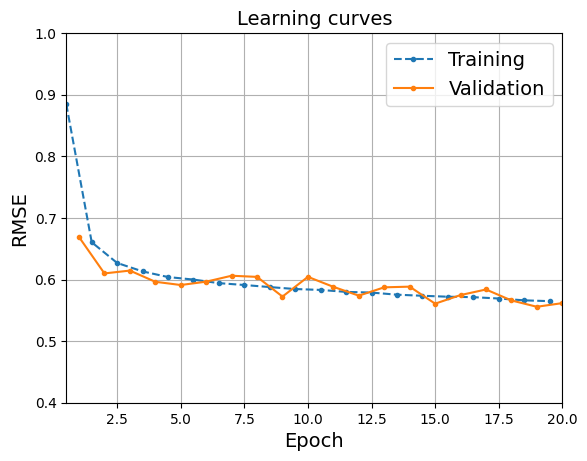

In [69]:
def train2(model, optimizer, criterion, metric, train_loader, valid_loader,
               n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for X_batch, y_batch in train_loader:
            model.train()
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_tm(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = nn.Sequential(
    nn.Linear(n_features, 50), nn.ReLU(),
    nn.Linear(50, 40), nn.ReLU(),
    nn.Linear(40, 30), nn.ReLU(),
    nn.Linear(30, 1)
)
model = model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

# Since we compute the training metric
plt.plot(np.arange(n_epochs) + 0.5, history["train_metrics"], ".--",
         label="Training")
plt.plot(np.arange(n_epochs) + 1.0, history["valid_metrics"], ".-",
         label="Validation")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid()
plt.title("Learning curves")
plt.axis([0.5, 20, 0.4, 1.0])
plt.legend()
plt.show()

# Building Nonsequential Models Using Custom Modules

In [74]:
class WideAndDeep(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential( #input 32, 8
            nn.Linear(n_features, 50), nn.ReLU(),  # output 32, 50
            nn.Linear(50, 40), nn.ReLU(), # output 32, 40
            nn.Linear(40, 30), nn.ReLU(), # output 32, 30
        )
        self.output_layer = nn.Linear(30 + n_features, 1) # shape 38, 1

    def forward(self, X): # 32, 8
        deep_output = self.deep_stack(X) # 32, 30
        wide_and_deep = torch.concat([X, deep_output], dim=1) # 32, 38
        return self.output_layer(wide_and_deep) # 32, 1

In [75]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002  # the model changed, so did the optimal learning rate

In [76]:
# extra code: train the model, exactly our previous models
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.7802, train metric: 1.3344, valid metric: 0.8690
Epoch 2/20, train loss: 0.6201, train metric: 0.7875, valid metric: 0.9492
Epoch 3/20, train loss: 0.5900, train metric: 0.7682, valid metric: 0.7331
Epoch 4/20, train loss: 0.5607, train metric: 0.7488, valid metric: 0.7771
Epoch 5/20, train loss: 0.5408, train metric: 0.7353, valid metric: 0.7967
Epoch 6/20, train loss: 0.5244, train metric: 0.7241, valid metric: 0.7098
Epoch 7/20, train loss: 0.5070, train metric: 0.7119, valid metric: 0.7419
Epoch 8/20, train loss: 0.4941, train metric: 0.7030, valid metric: 0.6750
Epoch 9/20, train loss: 0.4798, train metric: 0.6928, valid metric: 0.6762
Epoch 10/20, train loss: 0.4657, train metric: 0.6825, valid metric: 0.6678
Epoch 11/20, train loss: 0.4538, train metric: 0.6736, valid metric: 0.6617
Epoch 12/20, train loss: 0.4441, train metric: 0.6665, valid metric: 0.6651
Epoch 13/20, train loss: 0.4328, train metric: 0.6580, valid metric: 0.6803
Epoch 14/20, train lo

In [77]:
class WideAndDeepV2(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X):
        X_wide = X[:, :5] # 32, 5
        X_deep = X[:, 2:] # 32, 6
        deep_output = self.deep_stack(X_deep) # 32, 30
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1) # 32, 35
        return self.output_layer(wide_and_deep) # 32, 1

In [78]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)

In [79]:
# extra code: train the model, exactly our previous models
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train2(model, optimizer, mse, rmse, train_loader, valid_loader,
                 n_epochs)

Epoch 1/20, train loss: 1.8482, train metric: 1.3598, valid metric: 0.9100
Epoch 2/20, train loss: 0.6282, train metric: 0.7927, valid metric: 0.8028
Epoch 3/20, train loss: 0.5763, train metric: 0.7591, valid metric: 0.7567
Epoch 4/20, train loss: 0.5413, train metric: 0.7356, valid metric: 0.7290
Epoch 5/20, train loss: 0.5099, train metric: 0.7142, valid metric: 0.7011
Epoch 6/20, train loss: 0.4841, train metric: 0.6958, valid metric: 0.6816
Epoch 7/20, train loss: 0.4656, train metric: 0.6824, valid metric: 0.6670
Epoch 8/20, train loss: 0.4526, train metric: 0.6728, valid metric: 0.6576
Epoch 9/20, train loss: 0.4438, train metric: 0.6662, valid metric: 0.6539
Epoch 10/20, train loss: 0.4380, train metric: 0.6618, valid metric: 0.6498
Epoch 11/20, train loss: 0.4326, train metric: 0.6577, valid metric: 0.6470
Epoch 12/20, train loss: 0.4284, train metric: 0.6546, valid metric: 0.6447
Epoch 13/20, train loss: 0.4253, train metric: 0.6521, valid metric: 0.6452
Epoch 14/20, train lo

## Building Models with Multiple Inputs

In [80]:
class WideAndDeepV3(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)

    def forward(self, X_wide, X_deep): 
        deep_output = self.deep_stack(X_deep) # -> 32, 30
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1) # ->  32, 35
        return self.output_layer(wide_and_deep) # -> 32, 1

In [81]:
torch.manual_seed(42)
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32)

In [83]:
for i, (x1, x2, y) in enumerate(train_data_wd):
    if i == 0:
        print(x1)
        print(x2)
        print(y)

tensor([-0.1940, -1.0778, -0.9433,  0.0149,  0.0207])
tensor([-0.9433,  0.0149,  0.0207, -0.5729,  0.9292, -1.4221])
tensor([1.4420])


In [84]:
def evaluate_multi_in(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for X_batch_wide, X_batch_deep, y_batch in data_loader:
            # to device
            X_batch_wide = X_batch_wide.to(device)
            X_batch_deep = X_batch_deep.to(device)
            y_batch = y_batch.to(device)
            
            y_pred = model(X_batch_wide, X_batch_deep)
            metric.update(y_pred, y_batch)  # update it at each iteration
    return metric.compute()  # compute the final result at the end

def train_multi_in(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for *X_batch_inputs, y_batch in train_loader:
            # model train mode
            model.train()
            
            # batches to device
            X_batch_inputs = [X.to(device) for X in X_batch_inputs]
            y_batch = y_batch.to(device)

            # two tensors to input
            y_pred = model(*X_batch_inputs)

            # computer loss
            loss = criterion(y_pred, y_batch)

            # add loss
            total_loss += loss.item()

            # compute gradients
            loss.backward()
            # update params using gradients
            optimizer.step()
            # zero out gradients
            optimizer.zero_grad()
            # update metric for batch
            metric.update(y_pred, y_batch)
        # mean loss over epoch
        mean_loss = total_loss / len(train_loader)
        # writ to history
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_in(model, valid_loader, metric).item())
        
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_in(model, optimizer, mse, rmse, train_loader_wd,
                         valid_loader_wd, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5887
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5978
Epoch 14/20, train lo

#### Create our own tensor dataset

In [78]:
class WideAndDeepDataset(torch.utils.data.Dataset):
    def __init__(self, X_wide, X_deep, y):
        self.X_wide = X_wide
        self.X_deep = X_deep
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
        return input_dict, self.y[idx]

In [79]:
torch.manual_seed(42)
train_data_named = WideAndDeepDataset(
    X_wide=X_train[:, :5], X_deep=X_train[:, 2:], y=y_train)
train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_data_named = WideAndDeepDataset(
    X_wide=X_valid[:, :5], X_deep=X_valid[:, 2:], y=y_valid)
valid_loader_named = DataLoader(valid_data_named, batch_size=32)
test_data_named = WideAndDeepDataset(
    X_wide=X_test[:, :5], X_deep=X_test[:, 2:], y=y_test)
test_loader_named = DataLoader(test_data_named, batch_size=32)

In [80]:
def evaluate_named(model, data_loader, metric):
    model.eval()
    metric.reset()  # reset the metric at the beginning
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(X_wide=inputs["X_wide"], X_deep=inputs["X_deep"])
            metric.update(y_pred, y_batch)
    return metric.compute()  # compute the final result at the end

def train_named(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred = model(**inputs)
            loss = criterion(y_pred, y_batch)
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_named(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV3(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_named(model, optimizer, mse, rmse, train_loader_named,
                      valid_loader_named, n_epochs)

Epoch 1/20, train loss: 0.8366, train metric: 0.9148, valid metric: 0.6892
Epoch 2/20, train loss: 0.4627, train metric: 0.6803, valid metric: 0.6455
Epoch 3/20, train loss: 0.4319, train metric: 0.6572, valid metric: 0.6374
Epoch 4/20, train loss: 0.4259, train metric: 0.6525, valid metric: 0.6512
Epoch 5/20, train loss: 0.4120, train metric: 0.6420, valid metric: 0.6305
Epoch 6/20, train loss: 0.4040, train metric: 0.6356, valid metric: 0.6287
Epoch 7/20, train loss: 0.4005, train metric: 0.6330, valid metric: 0.6252
Epoch 8/20, train loss: 0.3976, train metric: 0.6306, valid metric: 0.6158
Epoch 9/20, train loss: 0.3883, train metric: 0.6230, valid metric: 0.7407
Epoch 10/20, train loss: 0.3866, train metric: 0.6218, valid metric: 0.6063
Epoch 11/20, train loss: 0.3752, train metric: 0.6125, valid metric: 0.5974
Epoch 12/20, train loss: 0.3704, train metric: 0.6087, valid metric: 0.5888
Epoch 13/20, train loss: 0.3677, train metric: 0.6063, valid metric: 0.5981
Epoch 14/20, train lo

## Building Models with Multiple Outputs

In [81]:
class WideAndDeepV4(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        self.deep_stack = nn.Sequential(
            nn.Linear(n_features - 2, 50), nn.ReLU(),
            nn.Linear(50, 40), nn.ReLU(),
            nn.Linear(40, 30), nn.ReLU(),
        )
        self.output_layer = nn.Linear(30 + 5, 1)
        self.aux_output_layer = nn.Linear(30, 1)

    def forward(self, X_wide, X_deep):
        deep_output = self.deep_stack(X_deep)
        wide_and_deep = torch.concat([X_wide, deep_output], dim=1)
        main_output = self.output_layer(wide_and_deep)
        aux_output = self.aux_output_layer(deep_output)
        return main_output, aux_output

In [82]:
import torchmetrics

def evaluate_multi_out(model, data_loader, metric):
    model.eval()
    metric.reset()
    with torch.no_grad():
        for inputs, y_batch in data_loader:
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, _ = model(**inputs)
            metric.update(y_pred, y_batch)
    return metric.compute()

def train_multi_out(model, optimizer, criterion, metric, train_loader,
                   valid_loader, n_epochs):
    history = {"train_losses": [], "train_metrics": [], "valid_metrics": []}
    for epoch in range(n_epochs):
        total_loss = 0.
        metric.reset()
        for inputs, y_batch in train_loader:
            model.train()
            inputs = {name: X.to(device) for name, X in inputs.items()}
            y_batch = y_batch.to(device)
            y_pred, y_pred_aux = model(**inputs)
            main_loss = criterion(y_pred, y_batch)
            aux_loss = criterion(y_pred_aux, y_batch)
            loss = 0.8 * main_loss + 0.2 * aux_loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            metric.update(y_pred, y_batch)
        mean_loss = total_loss / len(train_loader)
        history["train_losses"].append(mean_loss)
        history["train_metrics"].append(metric.compute().item())
        history["valid_metrics"].append(
            evaluate_multi_out(model, valid_loader, metric).item())
        print(f"Epoch {epoch + 1}/{n_epochs}, "
              f"train loss: {history['train_losses'][-1]:.4f}, "
              f"train metric: {history['train_metrics'][-1]:.4f}, "
              f"valid metric: {history['valid_metrics'][-1]:.4f}")
    return history

torch.manual_seed(42)
learning_rate = 0.01
model = WideAndDeepV4(n_features).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0)
mse = nn.MSELoss()
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
history = train_multi_out(model, optimizer, mse, rmse, train_loader_named,
                          valid_loader_named, n_epochs)

Epoch 1/20, train loss: 1.0693, train metric: 0.9506, valid metric: 0.7085
Epoch 2/20, train loss: 0.5817, train metric: 0.6946, valid metric: 0.6607
Epoch 3/20, train loss: 0.5010, train metric: 0.6581, valid metric: 0.6425
Epoch 4/20, train loss: 0.4690, train metric: 0.6497, valid metric: 0.6654
Epoch 5/20, train loss: 0.4503, train metric: 0.6420, valid metric: 0.6338
Epoch 6/20, train loss: 0.4387, train metric: 0.6373, valid metric: 0.6563
Epoch 7/20, train loss: 0.4315, train metric: 0.6330, valid metric: 0.6193
Epoch 8/20, train loss: 0.4249, train metric: 0.6302, valid metric: 0.6167
Epoch 9/20, train loss: 0.4116, train metric: 0.6202, valid metric: 0.6450
Epoch 10/20, train loss: 0.4085, train metric: 0.6198, valid metric: 0.5938
Epoch 11/20, train loss: 0.4073, train metric: 0.6197, valid metric: 0.5959
Epoch 12/20, train loss: 0.3914, train metric: 0.6078, valid metric: 0.6073
Epoch 13/20, train loss: 0.3847, train metric: 0.6033, valid metric: 0.5815
Epoch 14/20, train lo

# Building an Image Classifier with PyTorch

## Using TorchVision to Load the Dataset

In [83]:
import torchvision
import torchvision.transforms.v2 as T

toTensor = T.Compose([T.ToImage(), T.ToDtype(torch.float32, scale=True)])

train_and_valid_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=True, download=True, transform=toTensor)
test_data = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, download=True, transform=toTensor)

torch.manual_seed(42)
train_data, valid_data = torch.utils.data.random_split(
    train_and_valid_data, [55_000, 5_000])

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 178kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.26MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.1MB/s]


In [84]:
torch.manual_seed(42)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32)
test_loader = DataLoader(test_data, batch_size=32)

Each entry is a tuple (image, target):

In [85]:
X_sample, y_sample = train_data[0]

Each image has a shape \[channels, rows, columns\]. Grayscale images like in Fashion MNIST have a single channel (while RGB images have 3, and other types of images, such as satellite images, may have many more). Fashion images are grayscale and 28x28 pixels:

In [86]:
X_sample.shape

torch.Size([1, 28, 28])

In [87]:
X_sample.dtype

torch.float32

In [88]:
train_and_valid_data.classes[y_sample]

'Ankle boot'

## Building the Classifier

In [89]:
class ImageClassifier(nn.Module):
    def __init__(self, n_inputs, n_hidden1, n_hidden2, n_classes):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n_inputs, n_hidden1),
            nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Linear(n_hidden2, n_classes)
        )

    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                        n_classes=10).to(device)
xentropy = nn.CrossEntropyLoss()

In [90]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10).to(device)
_ = train2(model, optimizer, xentropy, accuracy, train_loader, valid_loader,
           n_epochs)

Epoch 1/20, train loss: 0.6058, train metric: 0.7816, valid metric: 0.8416
Epoch 2/20, train loss: 0.4059, train metric: 0.8497, valid metric: 0.8372
Epoch 3/20, train loss: 0.3633, train metric: 0.8663, valid metric: 0.8530
Epoch 4/20, train loss: 0.3359, train metric: 0.8762, valid metric: 0.8660
Epoch 5/20, train loss: 0.3147, train metric: 0.8835, valid metric: 0.8754
Epoch 6/20, train loss: 0.2991, train metric: 0.8881, valid metric: 0.8666
Epoch 7/20, train loss: 0.2859, train metric: 0.8916, valid metric: 0.8622
Epoch 8/20, train loss: 0.2745, train metric: 0.8971, valid metric: 0.8722
Epoch 9/20, train loss: 0.2639, train metric: 0.9007, valid metric: 0.8834
Epoch 10/20, train loss: 0.2531, train metric: 0.9041, valid metric: 0.8810
Epoch 11/20, train loss: 0.2463, train metric: 0.9068, valid metric: 0.8850
Epoch 12/20, train loss: 0.2353, train metric: 0.9109, valid metric: 0.8910
Epoch 13/20, train loss: 0.2303, train metric: 0.9125, valid metric: 0.8870
Epoch 14/20, train lo

In [91]:
model.eval()
X_new, y_new = next(iter(valid_loader))
X_new = X_new[:3].to(device)
with torch.no_grad():
    y_pred_logits = model(X_new)
y_pred = y_pred_logits.argmax(dim=1)  # index of the largest logit
y_pred

tensor([7, 4, 2], device='cuda:0')

In [92]:
[train_and_valid_data.classes[index] for index in y_pred]

['Sneaker', 'Coat', 'Pullover']

Let's check whether the model made the correct predictions:

In [93]:
y_new[:3]

tensor([7, 4, 2])

All correct! 😃

In [94]:
import torch.nn.functional as F
y_proba = F.softmax(y_pred_logits, dim=1)
if device == "mps":
    y_proba = y_proba.cpu()
y_proba.round(decimals=3)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0010, 0.0000, 0.9110, 0.0000,
         0.0880],
        [0.0000, 0.0000, 0.0040, 0.0000, 0.9960, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.6250, 0.0000, 0.3350, 0.0000, 0.0390, 0.0000, 0.0000,
         0.0000]], device='cuda:0')

In [95]:
y_top4_values, y_top4_indices = torch.topk(y_pred_logits, k=4, dim=1)
y_top4_probas = F.softmax(y_top4_values, dim=1)
if device == "mps":
    y_top4_probas = y_top4_probas.cpu()
y_top4_probas.round(decimals=3)

tensor([[0.9110, 0.0880, 0.0010, 0.0000],
        [0.9960, 0.0040, 0.0000, 0.0000],
        [0.6250, 0.3350, 0.0390, 0.0000]], device='cuda:0')

In [96]:
y_top4_indices

tensor([[7, 9, 5, 8],
        [4, 2, 6, 0],
        [2, 4, 6, 0]], device='cuda:0')

In [97]:
sum([param.numel() for param in model.parameters()])

266610

# Hyperparameter Tuning using Optuna

In [98]:
import optuna

def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    history = train2(model, optimizer, xentropy, accuracy, train_loader,
                     valid_loader, n_epochs=10)
    validation_accuracy = max(history["valid_metrics"])
    return validation_accuracy

In [99]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=5)

[I 2025-10-07 07:20:53,727] A new study created in memory with name: no-name-27fd1323-5c92-43f9-8071-fa800aebc54b


Epoch 1/10, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 2/10, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 3/10, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 4/10, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 5/10, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 6/10, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 7/10, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 8/10, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 9/10, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424


[I 2025-10-07 07:23:25,327] Trial 0 finished with value: 0.6435999870300293 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.6435999870300293.


Epoch 10/10, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/10, train loss: 1.1459, train metric: 0.6229, valid metric: 0.7338
Epoch 2/10, train loss: 0.6108, train metric: 0.7841, valid metric: 0.7992
Epoch 3/10, train loss: 0.5203, train metric: 0.8169, valid metric: 0.8094
Epoch 4/10, train loss: 0.4810, train metric: 0.8302, valid metric: 0.8310
Epoch 5/10, train loss: 0.4557, train metric: 0.8404, valid metric: 0.8352
Epoch 6/10, train loss: 0.4387, train metric: 0.8460, valid metric: 0.8442
Epoch 7/10, train loss: 0.4240, train metric: 0.8512, valid metric: 0.8408
Epoch 8/10, train loss: 0.4123, train metric: 0.8566, valid metric: 0.8514
Epoch 9/10, train loss: 0.3998, train metric: 0.8601, valid metric: 0.8532


[I 2025-10-07 07:25:57,218] Trial 1 finished with value: 0.8547999858856201 and parameters: {'learning_rate': 0.008471801418819975, 'n_hidden': 188}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.3897, train metric: 0.8638, valid metric: 0.8548
Epoch 1/10, train loss: 2.3069, train metric: 0.1144, valid metric: 0.1082
Epoch 2/10, train loss: 2.2993, train metric: 0.1231, valid metric: 0.1294
Epoch 3/10, train loss: 2.2914, train metric: 0.1606, valid metric: 0.1710
Epoch 4/10, train loss: 2.2836, train metric: 0.1839, valid metric: 0.1840
Epoch 5/10, train loss: 2.2762, train metric: 0.1891, valid metric: 0.1856
Epoch 6/10, train loss: 2.2692, train metric: 0.1910, valid metric: 0.1898
Epoch 7/10, train loss: 2.2623, train metric: 0.1933, valid metric: 0.1932
Epoch 8/10, train loss: 2.2554, train metric: 0.2000, valid metric: 0.2022
Epoch 9/10, train loss: 2.2485, train metric: 0.2122, valid metric: 0.2160


[I 2025-10-07 07:28:28,531] Trial 2 finished with value: 0.23340000212192535 and parameters: {'learning_rate': 4.207988669606632e-05, 'n_hidden': 63}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2414, train metric: 0.2299, valid metric: 0.2334
Epoch 1/10, train loss: 2.3035, train metric: 0.1373, valid metric: 0.1526
Epoch 2/10, train loss: 2.3005, train metric: 0.1569, valid metric: 0.1724
Epoch 3/10, train loss: 2.2975, train metric: 0.1755, valid metric: 0.1896
Epoch 4/10, train loss: 2.2945, train metric: 0.1941, valid metric: 0.2132
Epoch 5/10, train loss: 2.2914, train metric: 0.2105, valid metric: 0.2288
Epoch 6/10, train loss: 2.2884, train metric: 0.2261, valid metric: 0.2418
Epoch 7/10, train loss: 2.2853, train metric: 0.2419, valid metric: 0.2580
Epoch 8/10, train loss: 2.2823, train metric: 0.2581, valid metric: 0.2742
Epoch 9/10, train loss: 2.2792, train metric: 0.2736, valid metric: 0.2918


[I 2025-10-07 07:30:58,822] Trial 3 finished with value: 0.30959999561309814 and parameters: {'learning_rate': 1.7073967431528103e-05, 'n_hidden': 263}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 2.2761, train metric: 0.2897, valid metric: 0.3096
Epoch 1/10, train loss: 1.8379, train metric: 0.4869, valid metric: 0.6208
Epoch 2/10, train loss: 0.9751, train metric: 0.6666, valid metric: 0.6978
Epoch 3/10, train loss: 0.7608, train metric: 0.7253, valid metric: 0.7416
Epoch 4/10, train loss: 0.6704, train metric: 0.7639, valid metric: 0.7720
Epoch 5/10, train loss: 0.6108, train metric: 0.7913, valid metric: 0.7906
Epoch 6/10, train loss: 0.5687, train metric: 0.8053, valid metric: 0.8050
Epoch 7/10, train loss: 0.5386, train metric: 0.8164, valid metric: 0.8082
Epoch 8/10, train loss: 0.5158, train metric: 0.8243, valid metric: 0.8214
Epoch 9/10, train loss: 0.4988, train metric: 0.8279, valid metric: 0.8220


[I 2025-10-07 07:33:29,943] Trial 4 finished with value: 0.8220000267028809 and parameters: {'learning_rate': 0.002537815508265664, 'n_hidden': 218}. Best is trial 1 with value: 0.8547999858856201.


Epoch 10/10, train loss: 0.4842, train metric: 0.8330, valid metric: 0.8092


In [100]:
study.best_params

{'learning_rate': 0.008471801418819975, 'n_hidden': 188}

In [101]:
study.best_value

0.8547999858856201

In [102]:
def objective(trial, train_loader, valid_loader):
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    n_hidden = trial.suggest_int("n_hidden", 20, 300)
    model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=n_hidden,
                            n_hidden2=n_hidden, n_classes=10).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    accuracy = accuracy.to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(model, optimizer, xentropy, accuracy, train_loader,
                         valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

In [103]:
objective_with_data = lambda trial: objective(
    trial, train_loader=train_loader, valid_loader=valid_loader)

In [104]:
from functools import partial

objective_with_data = partial(objective, train_loader=train_loader,
                              valid_loader=valid_loader)

In [105]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective_with_data, n_trials=20)

[I 2025-10-07 07:33:29,993] A new study created in memory with name: no-name-38c4ab57-e010-4c31-b3e6-9cf84c20adce


Epoch 1/1, train loss: 2.2769, train metric: 0.1471, valid metric: 0.1860
Epoch 1/1, train loss: 2.2093, train metric: 0.2794, valid metric: 0.3500
Epoch 1/1, train loss: 2.1164, train metric: 0.4110, valid metric: 0.4554
Epoch 1/1, train loss: 1.9776, train metric: 0.5137, valid metric: 0.5562
Epoch 1/1, train loss: 1.7867, train metric: 0.5826, valid metric: 0.6026
Epoch 1/1, train loss: 1.5775, train metric: 0.6184, valid metric: 0.6228
Epoch 1/1, train loss: 1.3978, train metric: 0.6288, valid metric: 0.6326
Epoch 1/1, train loss: 1.2605, train metric: 0.6360, valid metric: 0.6372
Epoch 1/1, train loss: 1.1572, train metric: 0.6468, valid metric: 0.6424
Epoch 1/1, train loss: 1.0782, train metric: 0.6537, valid metric: 0.6436
Epoch 1/1, train loss: 1.0162, train metric: 0.6611, valid metric: 0.6530
Epoch 1/1, train loss: 0.9665, train metric: 0.6689, valid metric: 0.6620
Epoch 1/1, train loss: 0.9258, train metric: 0.6761, valid metric: 0.6700
Epoch 1/1, train loss: 0.8919, train m

[I 2025-10-07 07:38:38,280] Trial 0 finished with value: 0.7089999914169312 and parameters: {'learning_rate': 0.00031489116479568613, 'n_hidden': 287}. Best is trial 0 with value: 0.7089999914169312.


Epoch 1/1, train loss: 0.7647, train metric: 0.7196, valid metric: 0.7082
Epoch 1/1, train loss: 1.1485, train metric: 0.6157, valid metric: 0.7332
Epoch 1/1, train loss: 0.6133, train metric: 0.7864, valid metric: 0.8082
Epoch 1/1, train loss: 0.5200, train metric: 0.8179, valid metric: 0.8136
Epoch 1/1, train loss: 0.4783, train metric: 0.8311, valid metric: 0.8232
Epoch 1/1, train loss: 0.4533, train metric: 0.8402, valid metric: 0.8020
Epoch 1/1, train loss: 0.4357, train metric: 0.8465, valid metric: 0.8446
Epoch 1/1, train loss: 0.4211, train metric: 0.8510, valid metric: 0.8276
Epoch 1/1, train loss: 0.4083, train metric: 0.8562, valid metric: 0.8398
Epoch 1/1, train loss: 0.3981, train metric: 0.8606, valid metric: 0.8532
Epoch 1/1, train loss: 0.3881, train metric: 0.8640, valid metric: 0.8582
Epoch 1/1, train loss: 0.3782, train metric: 0.8663, valid metric: 0.8532
Epoch 1/1, train loss: 0.3699, train metric: 0.8693, valid metric: 0.8566
Epoch 1/1, train loss: 0.3631, train m

[I 2025-10-07 08:32:19,547] Trial 16 finished with value: 0.8848000168800354 and parameters: {'learning_rate': 0.032666299131732864, 'n_hidden': 142}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2271, train metric: 0.9154, valid metric: 0.8800


[I 2025-10-07 08:32:35,221] Trial 17 pruned. 


Epoch 1/1, train loss: 1.5604, train metric: 0.5038, valid metric: 0.6536
Epoch 1/1, train loss: 0.6189, train metric: 0.7751, valid metric: 0.8314
Epoch 1/1, train loss: 0.4237, train metric: 0.8447, valid metric: 0.8492
Epoch 1/1, train loss: 0.3814, train metric: 0.8605, valid metric: 0.8582
Epoch 1/1, train loss: 0.3567, train metric: 0.8681, valid metric: 0.8622
Epoch 1/1, train loss: 0.3375, train metric: 0.8744, valid metric: 0.8674
Epoch 1/1, train loss: 0.3246, train metric: 0.8788, valid metric: 0.8480
Epoch 1/1, train loss: 0.3123, train metric: 0.8849, valid metric: 0.8644
Epoch 1/1, train loss: 0.3012, train metric: 0.8871, valid metric: 0.8734
Epoch 1/1, train loss: 0.2915, train metric: 0.8916, valid metric: 0.8760
Epoch 1/1, train loss: 0.2858, train metric: 0.8931, valid metric: 0.8758
Epoch 1/1, train loss: 0.2778, train metric: 0.8955, valid metric: 0.8804
Epoch 1/1, train loss: 0.2715, train metric: 0.8972, valid metric: 0.8616
Epoch 1/1, train loss: 0.2642, train m

[I 2025-10-07 08:37:45,329] Trial 18 finished with value: 0.8830000162124634 and parameters: {'learning_rate': 0.0954812841907134, 'n_hidden': 50}. Best is trial 12 with value: 0.8867999911308289.


Epoch 1/1, train loss: 0.2353, train metric: 0.9109, valid metric: 0.8830


[I 2025-10-07 08:38:00,038] Trial 19 pruned. 


Epoch 1/1, train loss: 0.7417, train metric: 0.7395, valid metric: 0.7640


In [106]:
study.best_value

0.8867999911308289

In [107]:
study.best_params

{'learning_rate': 0.08525846269447772, 'n_hidden': 116}

# Saving and Loading a PyTorch Model

In [108]:
torch.save(model, "my_fashion_mnist.pt")

In [109]:
loaded_model = torch.load("my_fashion_mnist.pt", weights_only=False)

In [110]:
loaded_model.eval()
y_pred_logits = loaded_model(X_new)

In [111]:
torch.save(model.state_dict(), "my_fashion_mnist_weights.pt")

In [112]:
type(model.state_dict())

collections.OrderedDict

In [113]:
new_model = ImageClassifier(n_inputs=1 * 28 * 28, n_hidden1=300, n_hidden2=100,
                            n_classes=10)
loaded_weights = torch.load("my_fashion_mnist_weights.pt", weights_only=True)
new_model.load_state_dict(loaded_weights)
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [114]:
model_data = {
    "model_state_dict": model.state_dict(),
    "model_hyperparameters": {
        "n_inputs": 1 * 28 * 28,
        "n_hidden1": 300,
        "n_hidden2": 100,
        "n_classes": 10,
    }
}
torch.save(model_data, "my_fashion_mnist_model.pt")

In [115]:
loaded_data = torch.load("my_fashion_mnist_model.pt", weights_only=True)
new_model = ImageClassifier(**loaded_data["model_hyperparameters"])
new_model.load_state_dict(loaded_data["model_state_dict"])
new_model.eval()

ImageClassifier(
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=300, bias=True)
    (2): ReLU()
    (3): Linear(in_features=300, out_features=100, bias=True)
    (4): ReLU()
    (5): Linear(in_features=100, out_features=10, bias=True)
  )
)

# Compiling and Optimizing a PyTorch Model

In [116]:
torchscript_model = torch.jit.trace(model, X_new)

In [117]:
torchscript_model = torch.jit.script(model)

In [118]:
optimized_model = torch.jit.optimize_for_inference(torchscript_model)

In [119]:
optimized_model.save("my_fashion_mnist_torchscript.pt")

In [120]:
loaded_torchscript_model = torch.jit.load("my_fashion_mnist_torchscript.pt")

In [121]:
y_pred_logits = loaded_torchscript_model(X_new)
y_pred_logits

tensor([[ -3.3324,  -0.7572,  -4.1671,  -1.9444,  -1.6955,   2.0123,  -3.2624,
           8.6379,  -0.5685,   6.2972],
        [ -0.1434,  -3.8626,  11.8279,  -0.3164,  17.3995, -13.1888,   7.8158,
         -11.8338,  -1.4709,  -7.9412],
        [  0.3996,  -2.5537,   7.5992,   0.1775,   6.9748,  -6.1942,   4.8270,
          -5.8584,  -1.4327,  -4.3257]], device='cuda:0')

In [122]:
compiled_model = torch.compile(model)

In [123]:
if device == "cuda":
    y_pred_logits = compiled_model(X_new)

W1007 08:38:10.662000 360 torch/_inductor/utils.py:1436] [0/0] Not enough SMs to use max_autotune_gemm mode


# Exercise Solutions

## Exercises 1. to 12.

1. PyTorch is similar to NumPy is many ways, but it offers some extra features. The main ones are:
    * Auto-differentiation
    * Support for hardware accelerators
    * Includes optimizers and ready-to-use neural net components

2. `torch.exp()` returns a copy of the input tensor while `torch.exp_()` modifies it in place. Similarly, `torch.relu()` returns a copy while `torch.relu_()` modifies in place.

3. To create a new tensor on the GPU, you can use one of the following methods:
     * Set the `device` argument when calling `torch.tensor()`, `torch.rand()`, or other functions that create new tensors. For example, `torch.randn(10, device="cuda")` creates a new tensor on the CUDA GPU, with 10 random elements.
     * Create a new tensor on the CPU, then transfer it to the GPU by using calling its `to()` method, for example `torch.randn(10).to("cuda")`. However, it's more efficient to create the tensor directly on the GPU.
     * The `*_like()` functions such as `ones_like()` and `zeros_like()` create a new tensor on the same device as another tensor. They also use the same data type.
    * Lastly, if you execute an operation on a tensor that lives on the GPU, the result will generally be a new tensor on the GPU (unless you use an in-place operation such as `torch.exp_()`.

4. Here are three ways to perform tensor computations without using autograd:
    * Manipulate tensors created with `requires_grad=False` (which is the default).
    * Run the computations inside a `with torch.no_grad():` block.
    * Call the `detach()` method on the tensor you want to manipulate without autograd.

5. Here's what happens in each case:
    * The first code sample will work fine, it will _not_ cause a `RuntimeError`: indeed, the `cos()` method creates a new (non-leaf) tensor, then `exp_()` modifies it in place. During the backward pass, PyTorch is able to backpropagate through the `exp_()` operation because the derivative of exp(x) is exp(x), so PyTorch doesn't need to know what the input x was, it can just use the output of the forward pass (i.e., exp(x)) during the backward pass.
    * If you replace `z = t.cos().exp_()` with `z = t.cos_().exp()` then you will get a `RuntimeError` on that line ("_a leaf Variable that requires grad is being used in an in-place operation_"). Indeed, `t` is a leaf tensor (since it was created directly by the user, not the result of any computation) and you cannot apply an in-place operation on a leaf tensor with `requires_grad=True`.
    * If you replace `z = t.cos().exp_()` with `z = t.exp().cos_()`, then you will get a `RuntimeError` ("_one of the variables needed for gradient computation has been modified by an inplace operation_") during the backward pass. Indeed, the `exp()` operation relies on the fact that the derivative of exp(_t_) is exp(_t_), so it doesn't need to store the tensor `t` for the backward pass, instead it relies on the fact that it can just use the tensor returned by `t.exp()` (let's call it `e`). So far so good. But when we call the `cos_()` operation, it knows that it will need its input during the backward pass (since the derivative of cos(_e_) is –sin(_e_)), so it keeps a copy of its input tensor `e`. Next, it tries to modify the original `e` in-place, and in doing so it notices that this tensor is needed by another operation (`exp()`) for the backward pass, so it knows that something is fishy and it raises a `RuntimeError`.
    * The second code example will fail during backpropogation, with a `RuntimeError`. It's a very similar error to the previous one: the `cos()` operation stores a reference to its input tensor `v`, since `v` will be needed during the backward pass. Indeed, the derivative of cos(_v_) is –sin(_v_), so we need to save _v_. Next, the `sin_()` operation creates a copy of its input `v` (since it's an in-place operation, it knows that it must create a copy, not just preserve a reference) then it proceeds to modify the original `v`, but this tensor is needed to compute the gradient of `cos(_v_)`, so PyTorch raises a `RuntimeError`.
    * If you replace `w = v.cos() * v.sin_()` with `w = v.cos_() * v.sin()`, then there is no longer any `RuntimeError`. Indeed, the `cos_()` operation creates a copy of its input `v` so it can compute –sin(_v_) during the backward pass. The `sin()` operation is not in-place so in keeps a reference to its input `v`, not a copy. Backprop then runs just fine. However, there's a catch: by the time the `sin()` operation runs, its input `v` is no longer equal to 3.0, but instead it's equal to cos(3.0) since the `cos_()` modified `v` in place. As a result, `w = v.cos() * v.sin_()` does _not_ give the same result as `w = v.cos_() * v.sin()`. The former computes cos(3) * sin(3) while the latter computes cos(3) * sin(cos(3)). And of course the gradients change as well. That's why you should be very careful with in-place operations: they can make your code faster, sure, but they can also make it silently wrong.

6. A `Linear(100, 200)` module has 200 neurons: one per output. Its `weight` tensor has a shape of [200, 100] and its `bias` parameter has a shape of [200]. It expects its inputs to have a shape of [..., 100], for example [32, 100], or [32, 64, 100]. It treats all dimensions independently, except for the last one. The output shape is identical to the input shape, except that the last dimension is replaced with 200. For example, if the input shape is [32, 64, 100], then the output shape is [32, 64, 200].

7. The main steps of a PyTorch training loop are:
    * Prepare a batch of samples from the training set. You can use a `DataLoader` for this.
    * Optionally transfer these samples to the GPU (typically using `X_batch.to(device)` and `y_batch.to(device)`).
    * Run the inputs through the model, for example `y_pred = model(X_batch)`.
    * Compute the loss, for example `loss = criterion(y_pred, y_true)`.
    * Backpropagate through the loss using `loss.backward()`.
    * Perform an optimizer step: `optimizer.step()`.
    * Zero out the gradients: `optimizer.zero_grad()` (alternatively, you can do this before the backward pass, which may be safer if the gradients are non-zero before the training loop starts).
    * The whole training loop is often split into epochs, but this is optional.

8. It is recommended to create the optimizer _after_ the model is moved to the GPU because most optimizers have some internal state, and this state is usually allocated on the same device as the model parameters.

9. To speed up training when using a GPU, you should generally set the following `DataLoader` options:
    * Set the data loader's `num_workers` argument to the number of processes you want to use for data loading and preprocessing. This will often speed up training by pre-fetching the next batches on the CPU while the GPU is still working on the current batch. The optimal number depends on your platform, hardware, and workload, so you should experiment with different values.
    * Set the data loader's `prefetch_factor` argument to control the number of batches that each worker pre-fetches.
    * If spawning and synchronizing workers causes too much overhead (especially on Windows), you can try setting `persistent_workers=True` to reuse the same workers across epochs.

10. The main classification losses provided by PyTorch are:
    * `nn.CrossEntropyLoss`: this is generally the loss you want to use for multiclass classification, as it's efficient and numerically stable. This loss works directly on logits, not probabilities, so your model must not include the softmax activation function on the output layer. As a result, whenever you need to estimate probabilities, you must call the `F.softmax()` function on the logits output by the model.
    * `nn.BCEWithLogitsLoss` (BCE stands for _binary cross-entropy_): this is usually the loss you want to use for binary classification, for the same reason as `nn.CrossEntropyLoss`. Just like the previous loss, it works directly with logits, so your model must not include the sigmoid activation function on the output layer. Whenever you need to estimate probabilities, you must call the `F.sigmoid()` function on the logits output by the model. Note that some people prefer to use `nn.CrossEntropyLoss` even for binary classification, as it makes the code more consistent regardless of the number of classes, at a tiny computational and memory cost.
    * `nn.NLLLoss` (NLL stands for _negative log-likelihood_): this is an alternative to `nn.CrossEntropyLoss` for multiclass classification. To use it, your model must output log probabilities rather than logits. This can be done using `nn.LogSoftmax()` or `F.log_softmax()`. This approach is a bit slower than using `CrossEntropyLoss`, but it can be useful if you want your model to output log probabilities rather than logits, or when you wish to tweak the probability distribution before computing the final loss (indeed, it is sometimes easier to modify log probabilities rather than logits). Whenever you need to estimate probabilities, you must call `torch.exp()` on the model's outputs.
    * `nn.BCELoss`: this loss is an alternative to `nn.BCEWithLogitsLoss` for binary classification. It assumes that your model outputs probabilities rather than logits, so your model's output layer must use the sigmoid activation function. This can be convenient if you want your model to output probabilities directly, but it's a bit slower and less numerically stable than using `BCEWithLogitsLoss`.

11. Calling `model.train()` before training and `model.eval()` before evaluation is important because some layers (such as `nn.Dropout`, `nn.BatchNorm1d` or `nn.BatchNorm2d`) don't behave in the same way during training and evaluation, therefore we must tell the model in which mode it should run.

12. Both `torch.jit.trace()` and `torch.jit.script()` attempt to capture your model's computation graph and turn it into TorchScript code that can be optimized, saved, and deployed to various platforms. However, these functions work very differently:
    * The `torch.jit.trace()` function runs your model with a tracing tensor that captures which operations are executed. It's quite simple and works well for simple models, but it cannot capture conditionals (e.g., `if`, `elif`, `else`, `match`): it only captures the branch of the conditional that is actually executed during tracing. Similarly, if your model contains a loop (e.g., `for` or `while`) then tracing will not capture the loop itself, it will only capture the repeated operations.
    * The`torch.jit.script()` function actually parses your Python code to generate TorchScript code. This allows it to detect conditionals (as long as the conditions are tensors), and also capture loops. However, it only works with a subset of Python: you cannot use global variables, Python generators (`yield`), complex list comprehensions, variable length function arguments (`*args` or `**kwargs`), or `match` statements. Moreover, types must be fixed (a function cannot return an integer in some cases and a float in others), and you can only call other functions if they also respect these rules, so no standard library, no third-party libraries, etc.

## Exercise 13.

Exercise: _Use autograd to find the gradient vector of f(_x_, _y_) = sin(_x_<sup>2</sup> _y_) at the point (_x_, _y_) = (1.2, 3.4)._

In [124]:
def f(x, y):
    return torch.sin(x ** 2 * y)

x = torch.tensor(1.2, requires_grad=True)
y = torch.tensor(3.4, requires_grad=True)
result = f(x, y)
result.backward()

x.grad.item(), y.grad.item()

(1.489864706993103, 0.26291730999946594)

Alternatively, we could use a vectorized implementation:

In [125]:
def f(v):
    return torch.sin(v[0] ** 2 * v[1])

v = torch.tensor([1.2, 3.4], requires_grad=True)
result = f(v)
result.backward()

v.grad

tensor([1.4899, 0.2629])

We get the same partial derivatives, but this time they are wrapped in a gradient tensor.

Let's check this result by computing an approximation of the partial derivatives, using the fact that the partial derivative of a function $f(x, y)$ with regard to $x$, at a point $(x_0, y_0)$ is the limit of $\dfrac{f(x_0 + \epsilon, y_0) - f(x_0, y0)}{\epsilon}$ as $\epsilon$ approaches zero. Similarly, the partial derivative of that function with regard to $y$, at the same point $(x_0, y_0)$, is the limit of $\dfrac{f(x_0, y_0 + \epsilon) - f(x_0, y0)}{\epsilon}$ as $\epsilon$ approaches zero.

In [126]:
eps = 0.00005
df_dx = (f(x + eps, y) - f(x, y)) / eps
df_dy = (f(x, y + eps) - f(x, y)) / eps

df_dx.item(), df_dy.item()

(1.4901161193847656, 0.26226043701171875)

That's close enough.

We can also derive the equations for the partial derivatives mathematically (see the [calculus tutorial](math_differential_calculus.ipynb) to learn how to do this):
* $\dfrac{\partial f}{\partial x} = 2xy \cos(x^2 y)$
* $\dfrac{\partial f}{\partial x} = x^2 \cos(x^2 y)$

In [127]:
df_dx = 2 * x * y * torch.cos(x**2 * y)
df_dy = x ** 2 * torch.cos(x**2 * y)

df_dx.item(), df_dy.item()

(1.4898648262023926, 0.26291730999946594)

Perfect!

## Exercise 14.

Exercise: _Create a custom `Dense` module that replicates the functionality of an `nn.Linear` module followed by an `nn.ReLU` module. Try implementing it first using the `nn.Linear` and `nn.ReLU` modules, and then reimplement it using `nn.Parameter` and the `relu()` function._

In [128]:
class Dense(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.relu = nn.ReLU()

    def forward(self, X):
        return self.relu(self.linear(X))

Let's try it out:

In [129]:
torch.manual_seed(42)
dense = Dense(3, 5)
X = torch.randn(2, 3)
y_pred = dense(X)
y_pred.shape

torch.Size([2, 5])

Looks fine. We can double-check that it gives the right result:

In [130]:
y_pred_check = dense.relu(X @ dense.linear.weight.T + dense.linear.bias)
torch.allclose(y_pred, y_pred_check)

True

Nice. Now let's reimplement the `Dense` class using `nn.Parameter` and `relu()` instead of `nn.Linear` and `nn.ReLU`:

In [131]:
class Dense2(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(out_features, in_features))
        self.bias = nn.Parameter(torch.zeros(out_features))

    def forward(self, X):
        z = X @ self.weight.T + self.bias
        return F.relu(z)

Let's try it out:

In [132]:
torch.manual_seed(42)
dense2 = Dense2(3, 5)
X = torch.randn(2, 3)
y_pred2 = dense2(X)
y_pred2.shape

torch.Size([2, 5])

Looks fine. Again, we can double-check that it gives the right result:

In [133]:
y_pred2_check = F.relu(X @ dense2.weight.T + dense2.bias)
torch.allclose(y_pred2, y_pred2_check)

True

In Chapter 11, we will see that it's preferable to initialize the weights using Kaiming initialization, when the activation function is ReLU, so let's do that:

In [134]:
class Dense3(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.empty(out_features, in_features))
        nn.init.kaiming_uniform_(self.weight, nonlinearity="relu")
        self.bias = nn.Parameter(torch.zeros(out_features))

    def forward(self, X):
        z = X @ self.weight.T + self.bias
        return F.relu(z)

In [135]:
torch.manual_seed(42)
dense3 = Dense3(3, 5)
X = torch.randn(2, 3)
y_pred3 = dense3(X)
y_pred3.shape

torch.Size([2, 5])

Still works fine. Again, we can double-check that this module gives the right result:

In [136]:
y_pred3_check = F.relu(X @ dense3.weight.T + dense3.bias)
torch.allclose(y_pred3, y_pred3_check)

True

## Exercise 15.

Exercise: _Build and train a classification MLP on the CoverType dataset._

Step 1: _Load the dataset using `sklearn.datasets.fetch_covtype()` and create a custom PyTorch `Dataset` for this data._

**Warning**: do not forget to scale the inputs, as gradient descent might not work well otherwise (as we saw in Chapter 4).

In [137]:
from sklearn.datasets import fetch_covtype
from torch.utils.data import TensorDataset

covtype = fetch_covtype()

X_covtype = torch.tensor(covtype.data, dtype=torch.float32)
means = X_covtype.mean(dim=0, keepdim=True)
stds = X_covtype.std(dim=0, keepdim=True)
X_standardized_covtype = (X_covtype - means) / stds

y_covtype = torch.tensor(covtype.target - 1, dtype=torch.long)

covtype_dataset = TensorDataset(X_standardized_covtype, y_covtype)

Note that the targets range from 1 to 7, but the `nn.CrossEntropyLoss` expects it to start at 0, which is why we subtract 1 from the targets. We also convert the inputs from 64-bit floats to 32-bit floats, and the targets to 64-bit integers. These are the default types in PyTorch for floats and integers.

Let's look at the first instance:

In [138]:
sample0, target0 = covtype_dataset[0]
sample0.shape, target0.shape

(torch.Size([54]), torch.Size([]))

Looks good!

Step 2: _Create data loaders for training, validation, and testing._

The dataset is not shuffled or split by default, so we shuffle and split it:

In [139]:
from torch.utils.data import random_split

torch.manual_seed(42)

train_size = len(covtype_dataset) * 80 // 100
valid_size = len(covtype_dataset) * 10 // 100
test_size = len(covtype_dataset) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(
    covtype_dataset,
    [train_size, valid_size, test_size])

Now let's create the data loaders:

In [140]:
from torch.utils.data import DataLoader

batch_size = 256

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

Step 3: _Build a custom MLP module to tackle this classification task. You can optionally use the custom `Dense` module from the previous exercise._

There are several ways to do this. Let's look at a few alternatives.

Since we're building an MLP, which is just a stack of layers, we can just use a `nn.Sequential` module:

In [141]:
n_inputs = len(covtype.feature_names)  # == 54
n_classes = len(set(covtype.target))  # == 7

torch.manual_seed(42)
covtype_model = nn.Sequential(
    nn.Linear(n_inputs, 200), nn.ReLU(),
    nn.Linear(200, 100), nn.ReLU(),
    nn.Linear(100, 50), nn.ReLU(),
    nn.Linear(50, n_classes)
).to(device)

Note that the output layer must not use any activation function since we will use the `nn.CrossEntropyLoss`.

Alternatively, we can use the `Dense3` class we defined earlier:

In [142]:
torch.manual_seed(42)
covtype_model = nn.Sequential(
    Dense3(n_inputs, 200),
    Dense3(200, 100),
    Dense3(100, 50),
    nn.Linear(50, n_classes)
).to(device)

Or we can create a custom module. Let's make it flexible so it accepts a list containing the number of neurons in each hidden layer:

In [143]:
class CoverTypeModel(nn.Module):
    def __init__(self, n_neurons, n_inputs=n_inputs, n_classes=n_classes):
        super().__init__()
        layers = [
            Dense3(n_in, n_out)
            for n_in, n_out in zip([n_inputs] + n_neurons, n_neurons)
        ] + [nn.Linear(n_neurons[-1], n_classes)]
        self.mlp = nn.Sequential(*layers)

    def forward(self, X):
        return self.mlp(X)

torch.manual_seed(42)
covtype_model = CoverTypeModel([200, 100, 50]).to(device)

Lastly, we could use a `nn.ModuleList` instead of a `nn.Sequential` module, and modify the `forward()` method to explicitly run each layer:

In [144]:
class CoverTypeModel(nn.Module):
    def __init__(self, n_neurons, n_inputs=n_inputs, n_classes=n_classes):
        super().__init__()
        layers = [
            Dense3(n_in, n_out)
            for n_in, n_out in zip([n_inputs] + n_neurons, n_neurons)
        ] + [nn.Linear(n_neurons[-1], n_classes)]
        self.layers = nn.ModuleList(layers)

    def forward(self, X):
        for layer in self.layers:
            X = layer(X)
        return X

Step 4: _Train this model on the GPU, and try to reach 93% accuracy on the test set. For this, you will likely have to perform hyperparameter search to find the right number of layers and neurons per layer, a good learning rate and batch size, and so on. You can optionally use Optuna for this._


Let's train the model on the GPU. As we saw in Chapter 4, it's often helpful to reduce the learning rate at the end of training, so let's do that. We will train for 6 times 15 epochs, reducing the learning rate each time. The results might vary depending on the platform, but you should get over 94% accuracy on the test set.

In [145]:
torch.manual_seed(42)
covtype_model = CoverTypeModel([200, 100, 50]).to(device)

for learning_rate in [0.16, 0.08, 0.04, 0.02, 0.01, 0.005]:
    n_epochs = 15
    optimizer = torch.optim.SGD(covtype_model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    metric = torchmetrics.Accuracy(task="multiclass",
                                   num_classes=n_classes).to(device)
    history = train2(covtype_model, optimizer, criterion, metric, train_loader,
                     valid_loader, n_epochs)

Epoch 1/15, train loss: 0.5831, train metric: 0.7497, valid metric: 0.7917
Epoch 2/15, train loss: 0.4597, train metric: 0.8037, valid metric: 0.8138
Epoch 3/15, train loss: 0.4057, train metric: 0.8284, valid metric: 0.8317
Epoch 4/15, train loss: 0.3706, train metric: 0.8447, valid metric: 0.8384
Epoch 5/15, train loss: 0.3447, train metric: 0.8568, valid metric: 0.8638
Epoch 6/15, train loss: 0.3237, train metric: 0.8665, valid metric: 0.8642
Epoch 7/15, train loss: 0.3078, train metric: 0.8735, valid metric: 0.8720
Epoch 8/15, train loss: 0.2945, train metric: 0.8793, valid metric: 0.8845
Epoch 9/15, train loss: 0.2830, train metric: 0.8839, valid metric: 0.8786
Epoch 10/15, train loss: 0.2737, train metric: 0.8881, valid metric: 0.8675
Epoch 11/15, train loss: 0.2654, train metric: 0.8916, valid metric: 0.8917
Epoch 12/15, train loss: 0.2561, train metric: 0.8959, valid metric: 0.8846
Epoch 13/15, train loss: 0.2513, train metric: 0.8982, valid metric: 0.8910
Epoch 14/15, train lo

In [146]:
evaluate_tm(covtype_model, test_loader, metric)

tensor(0.9488, device='cuda:0')

I manually tuned the hyperparameters above through trial and error. It took about 30 minutes of search to achieve over 94% accuracy, so I didn’t need to run a full hyperparameter search. However, you can definitely use Optuna for this task if you want to get even better results. The code below tunes the learning rate, the number of hidden layers, and the number of neurons per hidden layer.

In [147]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 1e-2, 1.0, log=True)
    n_layers = trial.suggest_int("n_layers", 1, 3)
    n_hidden = trial.suggest_int("n_hidden", 30, 150)
    covtype_model = CoverTypeModel([n_hidden] * n_layers).to(device)
    optimizer = torch.optim.SGD(covtype_model.parameters(), lr=learning_rate)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass",
                                     num_classes=n_classes).to(device)
    best_validation_accuracy = 0.0
    for epoch in range(n_epochs):
        history = train2(covtype_model, optimizer, xentropy, accuracy,
                         train_loader, valid_loader, n_epochs=1)
        validation_accuracy = max(history["valid_metrics"])
        if validation_accuracy > best_validation_accuracy:
            best_validation_accuracy = validation_accuracy
        trial.report(validation_accuracy, step=epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
    return best_validation_accuracy

**Note**: I’ve set `n_trials=2` so you can run a quick test, but if you want to actually tune the hyperparameters, you should increase this to at least 50—and ideally to several hundred, but it will take several hours.

In [148]:
torch.manual_seed(42)
sampler = optuna.samplers.TPESampler(seed=42)
pruner = optuna.pruners.MedianPruner()
study = optuna.create_study(direction="maximize", sampler=sampler,
                            pruner=pruner)
study.optimize(objective, n_trials=2)

[I 2025-11-10 21:19:34,312] A new study created in memory with name: no-name-a48459d0-5e94-406c-88f9-e1bc884a62f9


Epoch 1/1, train loss: 0.6379, train metric: 0.7310, valid metric: 0.7674
Epoch 1/1, train loss: 0.5245, train metric: 0.7765, valid metric: 0.7928
Epoch 1/1, train loss: 0.4782, train metric: 0.7976, valid metric: 0.7992
Epoch 1/1, train loss: 0.4444, train metric: 0.8131, valid metric: 0.8180
Epoch 1/1, train loss: 0.4185, train metric: 0.8249, valid metric: 0.8197
Epoch 1/1, train loss: 0.3978, train metric: 0.8341, valid metric: 0.8434
Epoch 1/1, train loss: 0.3801, train metric: 0.8421, valid metric: 0.8480
Epoch 1/1, train loss: 0.3635, train metric: 0.8498, valid metric: 0.8281
Epoch 1/1, train loss: 0.3501, train metric: 0.8558, valid metric: 0.8549
Epoch 1/1, train loss: 0.3385, train metric: 0.8613, valid metric: 0.8684
Epoch 1/1, train loss: 0.3270, train metric: 0.8660, valid metric: 0.8718
Epoch 1/1, train loss: 0.3170, train metric: 0.8704, valid metric: 0.8714
Epoch 1/1, train loss: 0.3070, train metric: 0.8751, valid metric: 0.8676
Epoch 1/1, train loss: 0.3015, train m

[I 2025-11-10 21:20:29,002] Trial 0 finished with value: 0.8718438744544983 and parameters: {'learning_rate': 0.05611516415334506, 'n_layers': 3, 'n_hidden': 118}. Best is trial 0 with value: 0.8718438744544983.


Epoch 1/1, train loss: 0.2921, train metric: 0.8814, valid metric: 0.8700
Epoch 1/1, train loss: 0.6367, train metric: 0.7331, valid metric: 0.7501
Epoch 1/1, train loss: 0.5668, train metric: 0.7583, valid metric: 0.7631
Epoch 1/1, train loss: 0.5447, train metric: 0.7674, valid metric: 0.7765
Epoch 1/1, train loss: 0.5293, train metric: 0.7748, valid metric: 0.7797
Epoch 1/1, train loss: 0.5186, train metric: 0.7789, valid metric: 0.7738
Epoch 1/1, train loss: 0.5109, train metric: 0.7830, valid metric: 0.7894
Epoch 1/1, train loss: 0.5046, train metric: 0.7853, valid metric: 0.7897
Epoch 1/1, train loss: 0.4998, train metric: 0.7879, valid metric: 0.7919
Epoch 1/1, train loss: 0.4961, train metric: 0.7886, valid metric: 0.7948
Epoch 1/1, train loss: 0.4925, train metric: 0.7907, valid metric: 0.7884
Epoch 1/1, train loss: 0.4895, train metric: 0.7925, valid metric: 0.8016
Epoch 1/1, train loss: 0.4865, train metric: 0.7935, valid metric: 0.7924
Epoch 1/1, train loss: 0.4862, train m

[I 2025-11-10 21:21:15,807] Trial 1 finished with value: 0.8016385436058044 and parameters: {'learning_rate': 0.15751320499779728, 'n_layers': 1, 'n_hidden': 48}. Best is trial 0 with value: 0.8718438744544983.


Epoch 1/1, train loss: 0.4792, train metric: 0.7962, valid metric: 0.7894


In [149]:
study.best_value

0.8718438744544983

In [150]:
study.best_params

{'learning_rate': 0.05611516415334506, 'n_layers': 3, 'n_hidden': 118}

Hope you enjoyed this chapter!